In [61]:
!pip install tensorflow

In [62]:
# Install the library
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard

In [63]:
# download data
(x_train, y_train), (x_test, y_test)= mnist.load_data()

In [64]:
# shape the data
x_train.shape, x_test.shape


((60000, 28, 28), (10000, 28, 28))

In [65]:
# Normalization
x_train = x_train/255.0
x_test = x_test/255.0

In [66]:
# Reshape
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [67]:
import tensorflow as tf

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test  = tf.keras.utils.to_categorical(y_test, 10)

In [68]:
# Train / Validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

print("Train:", x_train.shape, y_train.shape)
print("Val:", x_val.shape, y_val.shape)
print("Test:", x_test.shape, y_test.shape)

Train: (50000, 28, 28, 1) (50000, 10)
Val: (10000, 28, 28, 1) (10000, 10)
Test: (10000, 28, 28, 1) (10000, 10)


In [69]:
# Model cnn

Model_cnn = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1), padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.2),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.3),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    Dense(10, activation='softmax')
])

# Compile
Model_cnn.compile(optimizer = 'Adam' ,loss='categorical_crossentropy',metrics=['accuracy'])

In [70]:
Model_cnn.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 422,538 (1.61 MB)

 Trainable params: 422,090 (1.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [71]:
# Make EarlyS topping

from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [72]:
# Training
model_train = Model_cnn.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=30,
    batch_size=128,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 100s 244ms/step - accuracy: 0.8581 - loss: 0.4640 - val_accuracy: 0.5790 - val_loss: 1.1164
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 90s 230ms/step - accuracy: 0.9740 - loss: 0.0881 - val_accuracy: 0.9792 - val_loss: 0.0674
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 144s 236ms/step - accuracy: 0.9794 - loss: 0.0659 - val_accuracy: 0.9886 - val_loss: 0.0359
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 141s 233ms/step - accuracy: 0.9835 - loss: 0.0530 - val_accuracy: 0.9884 - val_loss: 0.0400
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 140s 228ms/step - accuracy: 0.9858 - loss: 0.0448 - val_accuracy: 0.9894 - val_loss: 0.0346
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 148s 242ms/step - accuracy: 0.9867 - loss: 0.0406 - val_accuracy: 0.9907 - val_loss: 0.0315
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 137s 228ms/step - accuracy: 0.9898 - loss: 0.0330 - val_accuracy: 0.9878 - val_loss: 0.0416
Epoch 8/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 141s 225ms/step - accuracy: 0.9897 - 

In [75]:
# Print The accuarcy and loss

loss, acc = Model_cnn.evaluate(x_test, y_test, verbose=0)
print(f"\n Test Accuracy: {acc:.4f}")


 Test Accuracy: 0.9929


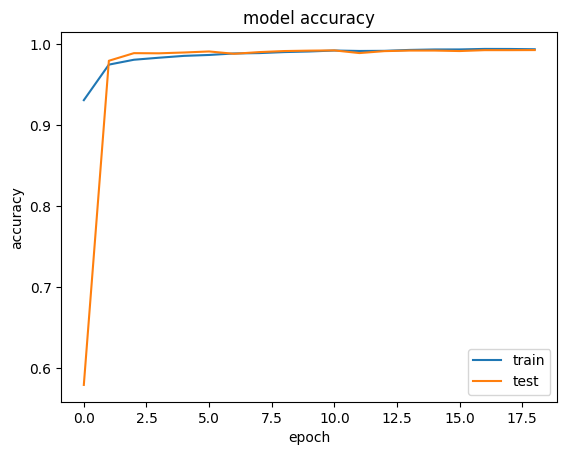

In [74]:
plt.plot(model_train.history['accuracy'])
plt.plot(model_train.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc= 'lower right')
plt.show()

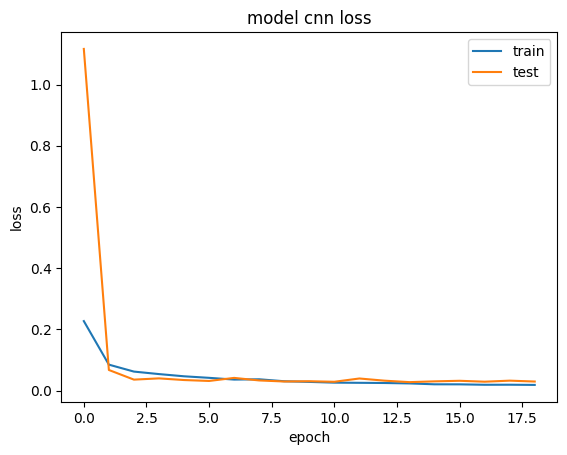

In [73]:
plt.plot(model_train.history['loss'])
plt.plot(model_train.history['val_loss'])
plt.title('model cnn loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc= 'upper right')
plt.show()

In [76]:
predicted_model = Model_cnn.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


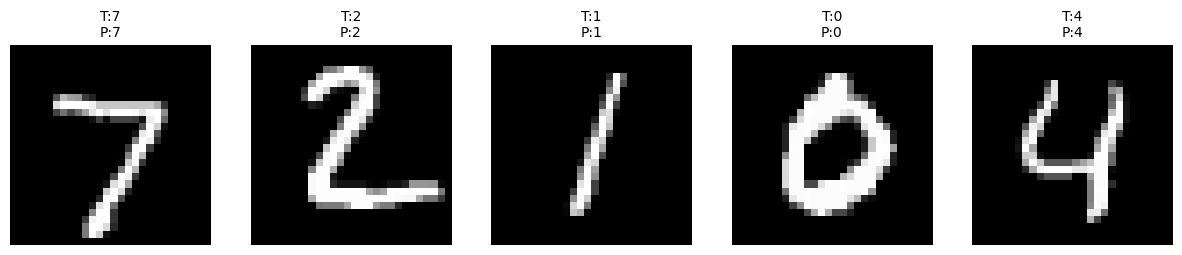

In [86]:
def plot_img(images, true_labels, pred_labels):
    n = len(images)
    plt.figure(figsize=(15, 4))
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"T:{true_labels[i]}\nP:{pred_labels[i]}", fontsize=10)
        plt.axis('off')
    plt.show()

pred_probs = Model_cnn.predict(x_test[:5])
pred_labels = np.argmax(pred_probs, axis=1)

plot_img(x_test[:5], np.argmax(y_test[:5], axis=1), pred_labels)